In [1]:
import os
import sys
sys.path.append(os.getcwd() + '/..')

In [2]:
from vic3analyze.database import get_db
from sqlalchemy.orm import Session
from sqlalchemy.sql import text

db = get_db()

print(f"Loaded db {db}")

Loaded db Engine(sqlite:////home/jason/projects/vic3/analyzer/vic3.db)


In [3]:
from vic3analyze.tables.country_basics import CountryBasics
from vic3analyze.tables.metadata import *

In [30]:

from sqlalchemy import select
import pandas as pd

stmt = (
    select(CountryBasics)
    .where(CountryBasics.run_id == '28593703-f5f8-4b3f-9b4e-249a2e8e9767')
    .where(CountryBasics.tag.in_(('GBR', 'FRA', 'PRU', 'RUS', 'AUS', 'USA', 'JAP')))
)
df = pd.read_sql(stmt, db.connect())
df

,run_id,game_date,tag,gdp,prestige,standard_of_living,population,radicals,loyalists,treasury,investment_pool,credit_limit
0,28593703-f5f8-4b3f-9b4e-249a2e8e9767,1836-02-01,AUS,5.279900e+05,490.0,11.44953,34695473,7158,167,2.788693e+06,0.00000,8.447908e+06
1,28593703-f5f8-4b3f-9b4e-249a2e8e9767,1836-02-01,FRA,9.200191e+05,1113.0,11.36219,33894723,4428,0,4.725970e+06,123555.02542,1.402647e+07
2,28593703-f5f8-4b3f-9b4e-249a2e8e9767,1836-02-01,GBR,1.096002e+06,1409.0,14.11781,26055882,5393,0,5.577989e+06,216702.49630,1.485124e+07
3,28593703-f5f8-4b3f-9b4e-249a2e8e9767,1836-02-01,JAP,2.890432e+05,100.0,10.05366,31128984,0,0,1.529278e+06,0.00000,3.954937e+06
4,28593703-f5f8-4b3f-9b4e-249a2e8e9767,1836-02-01,PRU,3.547748e+05,404.0,11.45958,13740708,22,0,1.829077e+06,0.00000,5.217940e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
296,28593703-f5f8-4b3f-9b4e-249a2e8e9767,1839-09-01,GBR,1.096002e+06,1409.0,14.11781,26055882,1345733,496353,9.191379e+06,0.00000,1.496279e+07
297,28593703-f5f8-4b3f-9b4e-249a2e8e9767,1839-09-01,JAP,2.890432e+05,100.0,10.05366,31128984,118799,166360,2.791319e+06,0.00000,3.993274e+06
298,28593703-f5f8-4b3f-9b4e-249a2e8e9767,1839-09-01,PRU,3.547748e+05,404.0,11.45958,13740708,356427,483463,5.333702e+05,392954.23123,5.503910e+06
299,28593703-f5f8-4b3f-9b4e-249a2e8e9767,1839-09-01,RUS,9.148187e+05,860.0,9.41713,58813704,3262080,582506,1.651494e+06,0.00000,1.332998e+07


<AxesSubplot: xlabel='game_date', ylabel='prestige'>

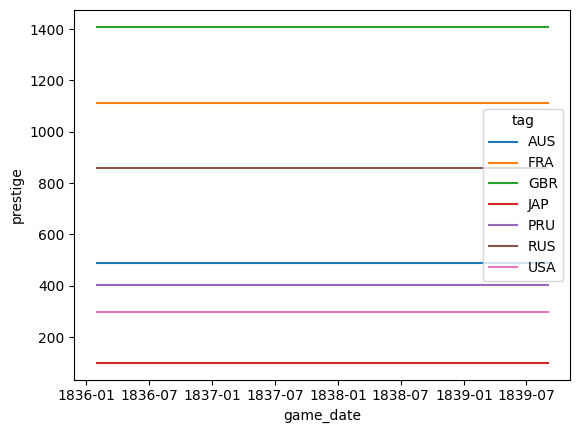

In [31]:
import seaborn
seaborn.lineplot(df, x='game_date', y='prestige', hue='tag')